In [40]:
#读数据集
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/aqing/Desktop/feature_test_Bee_016.csv") 
print(df['TI'])

0      19.995989
1      19.377771
2      18.683294
3      17.698383
4      16.584223
         ...    
921     0.255454
922     0.243946
923     0.286627
924     0.282209
925     0.672021
Name: TI, Length: 926, dtype: float64


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<ipython-input-13-ff1d0a62359a>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TI'],
<ipython-input-13-ff1d0a62359a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SI'],


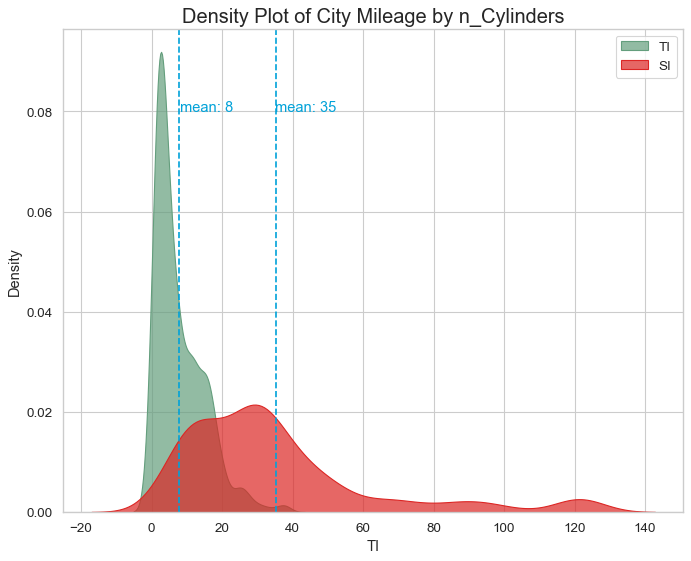

In [13]:
# Draw Plot展示连续变量的分布情况
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(df['TI'],
            shade=True,
            color="#649E7D",
            label="TI",
            alpha=.7)
sns.kdeplot(df['SI'],
            shade=True,
            color="#dc2624",
            label="SI",
            alpha=.7)

#计算均值并绘制均值竖线
mean = np.mean(df['TI'])
plt.axvline(mean, color="#01a2d9", linestyle='--')
mean = np.mean(df['SI'])
plt.axvline(mean, color="#01a2d9", linestyle='--')

plt.text(x = round(np.mean(df['TI'])),
         y = 0.08,
         s = 'mean: {:.0f}'.format(round(np.mean(df['TI']))),
         color = '#01a2d9')

plt.text(x = round(np.mean(df['SI'])),
         y = 0.08,
         s = 'mean: {:.0f}'.format(round(np.mean(df['SI']))),
         color = '#01a2d9')

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=18)
plt.legend()
plt.show()



<ipython-input-14-bc10de29844e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TI'],
<ipython-input-14-bc10de29844e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SI'],


7.838320549676026
35.350155248380126


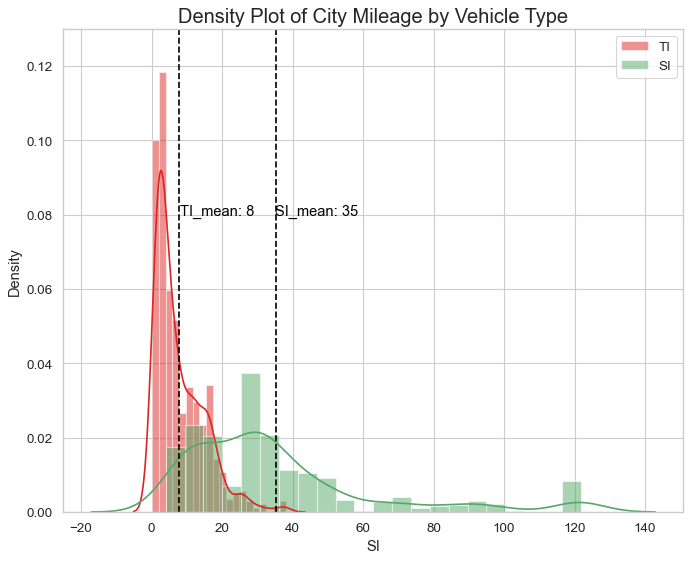

In [14]:
# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.distplot(df['TI'],
             color="#dc2624",
             label="TI",
             hist_kws={'alpha': .5},
             kde_kws={'linewidth': 1.5})
sns.distplot(df['SI'],
             color="g",
             label="SI",
             hist_kws={'alpha': .5},
             kde_kws={'linewidth': 1.5})
plt.ylim(0, 0.13)

#计算均值并绘制均值竖线
mean = np.mean(df['TI'])
print(mean)
plt.axvline(mean, color='black', linestyle='--')
mean = np.mean(df['SI'])
print(mean)
plt.axvline(mean, color='black', linestyle='--')

plt.text(x = round(np.mean(df['TI'])),
         y = 0.08,
         s = 'TI_mean: {:.0f}'.format(round(np.mean(df['TI']))),
         color = 'black')

plt.text(x = round(np.mean(df['SI'])),
         y = 0.08,
         s = 'SI_mean: {:.0f}'.format(round(np.mean(df['SI']))),
         color = 'black')

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=18)
plt.legend()
plt.show()

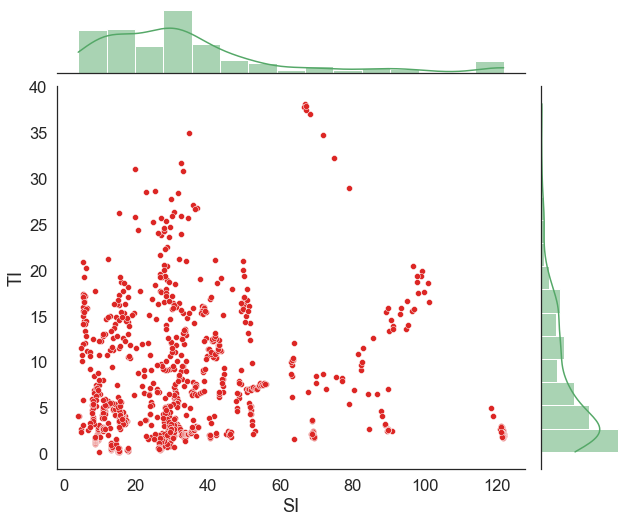

In [6]:
import numpy as np
sns.set(style="white",font_scale=1.5)#设置主题，文本大小
pd_iris = df.loc[ : ,"TI":"SI"]
#print(pd_iris)
 
g = sns.jointplot(x='SI', y='TI', data=pd_iris,#输入两个绘图变量
                 color='#dc2624',#修改颜色
                  marginal_kws=dict(bins=15, #hist箱子个数
                                    kde=True,#开启核密度图
                                    color="g",#直方图hist填充色                                    
                                   ),
                 )
g.fig.set_size_inches(10,8)#设置图尺寸

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, normalized_mutual_info_score, rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#读数据集
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/aqing/Desktop/feature_test_Bee_016.csv") 

name=df['name']#[y for y in range(1, 926)]
columns = list(df.columns)  # 获取数据集的第一行，第一行通常为特征名，所以先取出
features = columns[len(columns)-1:]  # 数据集的特征名（去除了最后一列，因为最后一列存放的是标签，不是数据）
data = df.iloc[:,len(columns)-1:]
n= 2

km = KMeans(n_clusters=n)
# label聚类后各数据所属标签
label = km.fit_predict(data)
# fit_predict(): 计算簇中心以及为簇分配序号
nameCluster = [[] for _ in range(n)]

for i in range(len(name)):
    nameCluster[label[i]].append(name[i])

expense = np.sum(km.cluster_centers_,axis=1)

#for i in range(n):
#    print("【{}】,聚类中心的数值加和:{:.0f}, {}".format(i,expense[i],nameCluster[i]))

# list转dataframe
df = pd.DataFrame(label, columns=['label'])
df.to_excel("E:/研学/实验数据/TI_label.xlsx", index=False)
 

PermissionError: [Errno 13] Permission denied: 'E:/研学/实验数据/TI_label.xlsx'

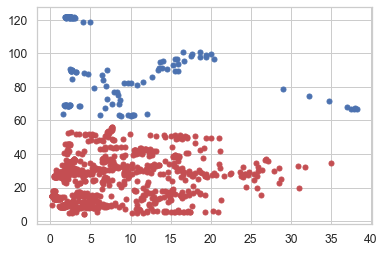

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, normalized_mutual_info_score, rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#读数据集
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/aqing/Desktop/feature_test_Bee_016.csv") 


name=df['name']#[y for y in range(1, 926)]
columns = list(df.columns)  # 获取数据集的第一行，第一行通常为特征名，所以先取出
features = columns[len(columns)-2:]  # 数据集的特征名（去除了最后一列，因为最后一列存放的是标签，不是数据）
data = df.iloc[:,len(columns)-2:]
n= 2

km = KMeans(n_clusters=n)
# label聚类后各数据所属标签
e= km.fit(data)
label_pred = e.labels_ #获取聚类标签
centroids = e.cluster_centers_ #获取聚类中心
inertia = e.inertia_ # 获取聚类准则的总和

# list转dataframe
df = pd.DataFrame(label, columns=['label'])
#df.to_excel("E:/研学/实验数据/SI_label.xlsx", index=False)

mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
color = 0
j = 0 
for i in label_pred:
    plt.plot([data['TI'][j:j+1]], [data['SI'][j:j+1]], mark[i], markersize = 5)
    j +=1
plt.show()

# list转dataframe
df = pd.DataFrame(label_pred, columns=['label'])
df.to_excel("E:/研学/实验数据/SI_label.xlsx", index=False)
 

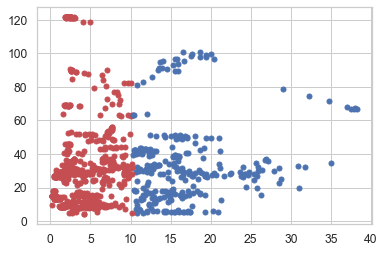

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, normalized_mutual_info_score, rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#读数据集
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/aqing/Desktop/feature_test_Bee_016.csv") 


name=df['name']#[y for y in range(1, 926)]
columns = list(df.columns)  # 获取数据集的第一行，第一行通常为特征名，所以先取出
features = columns[len(columns)-2:]  # 数据集的特征名（去除了最后一列，因为最后一列存放的是标签，不是数据）
data = df.iloc[:,len(columns)-2:]
n= 2

km = KMeans(n_clusters=n)
# label聚类后各数据所属标签
e= km.fit(df.iloc[:,len(columns)-2:len(columns)-1])
label_pred = e.labels_ #获取聚类标签
centroids = e.cluster_centers_ #获取聚类中心
inertia = e.inertia_ # 获取聚类准则的总和

# list转dataframe
df = pd.DataFrame(label, columns=['label'])
#df.to_excel("E:/研学/实验数据/SI_label.xlsx", index=False)

mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
color = 0
j = 0 
for i in label_pred:
    plt.plot([data['TI'][j:j+1]], [data['SI'][j:j+1]], mark[i], markersize = 5)
    j +=1
plt.show()
# list转dataframe
df = pd.DataFrame(label_pred, columns=['label'])
df.to_excel("E:/研学/实验数据/TI_label.xlsx", index=False)
 